Note: you may need to restart the kernel to use updated packages.


ERROR: basemap-1.0.8-cp34-none-win_amd64.whl is not a supported wheel on this platform.


In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [144]:
df = pd.read_csv('Housing.csv')

In [145]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [146]:
df.shape

(20640, 10)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [148]:
#Null values present 
df = df.dropna()

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<AxesSubplot:>

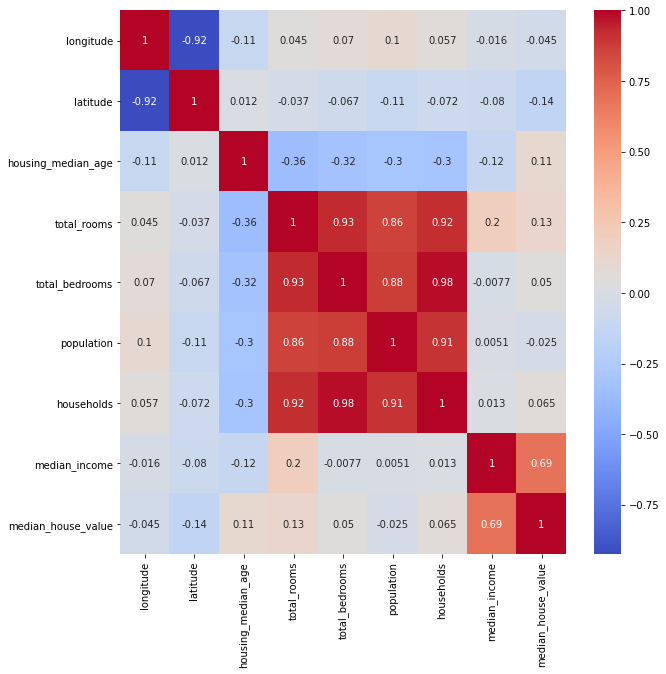

In [150]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)

In [151]:
#The only thing median_house_value strongly correlates with is median_income

In [152]:
BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())

In [153]:
#using imread to load the state of California
cal = plt.imread('map.png')

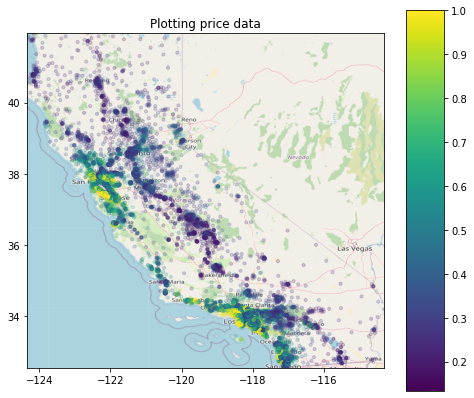

In [154]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c=df.median_house_value, s=10)
ax.set_title('Plotting price data')
cax = ax.imshow(cal, zorder=0, extent = BBox, aspect= 'equal')
cbar   = fig.colorbar(cax,aspect=10)
plt.show()

In [155]:
#Coastal houses have a higher median house value

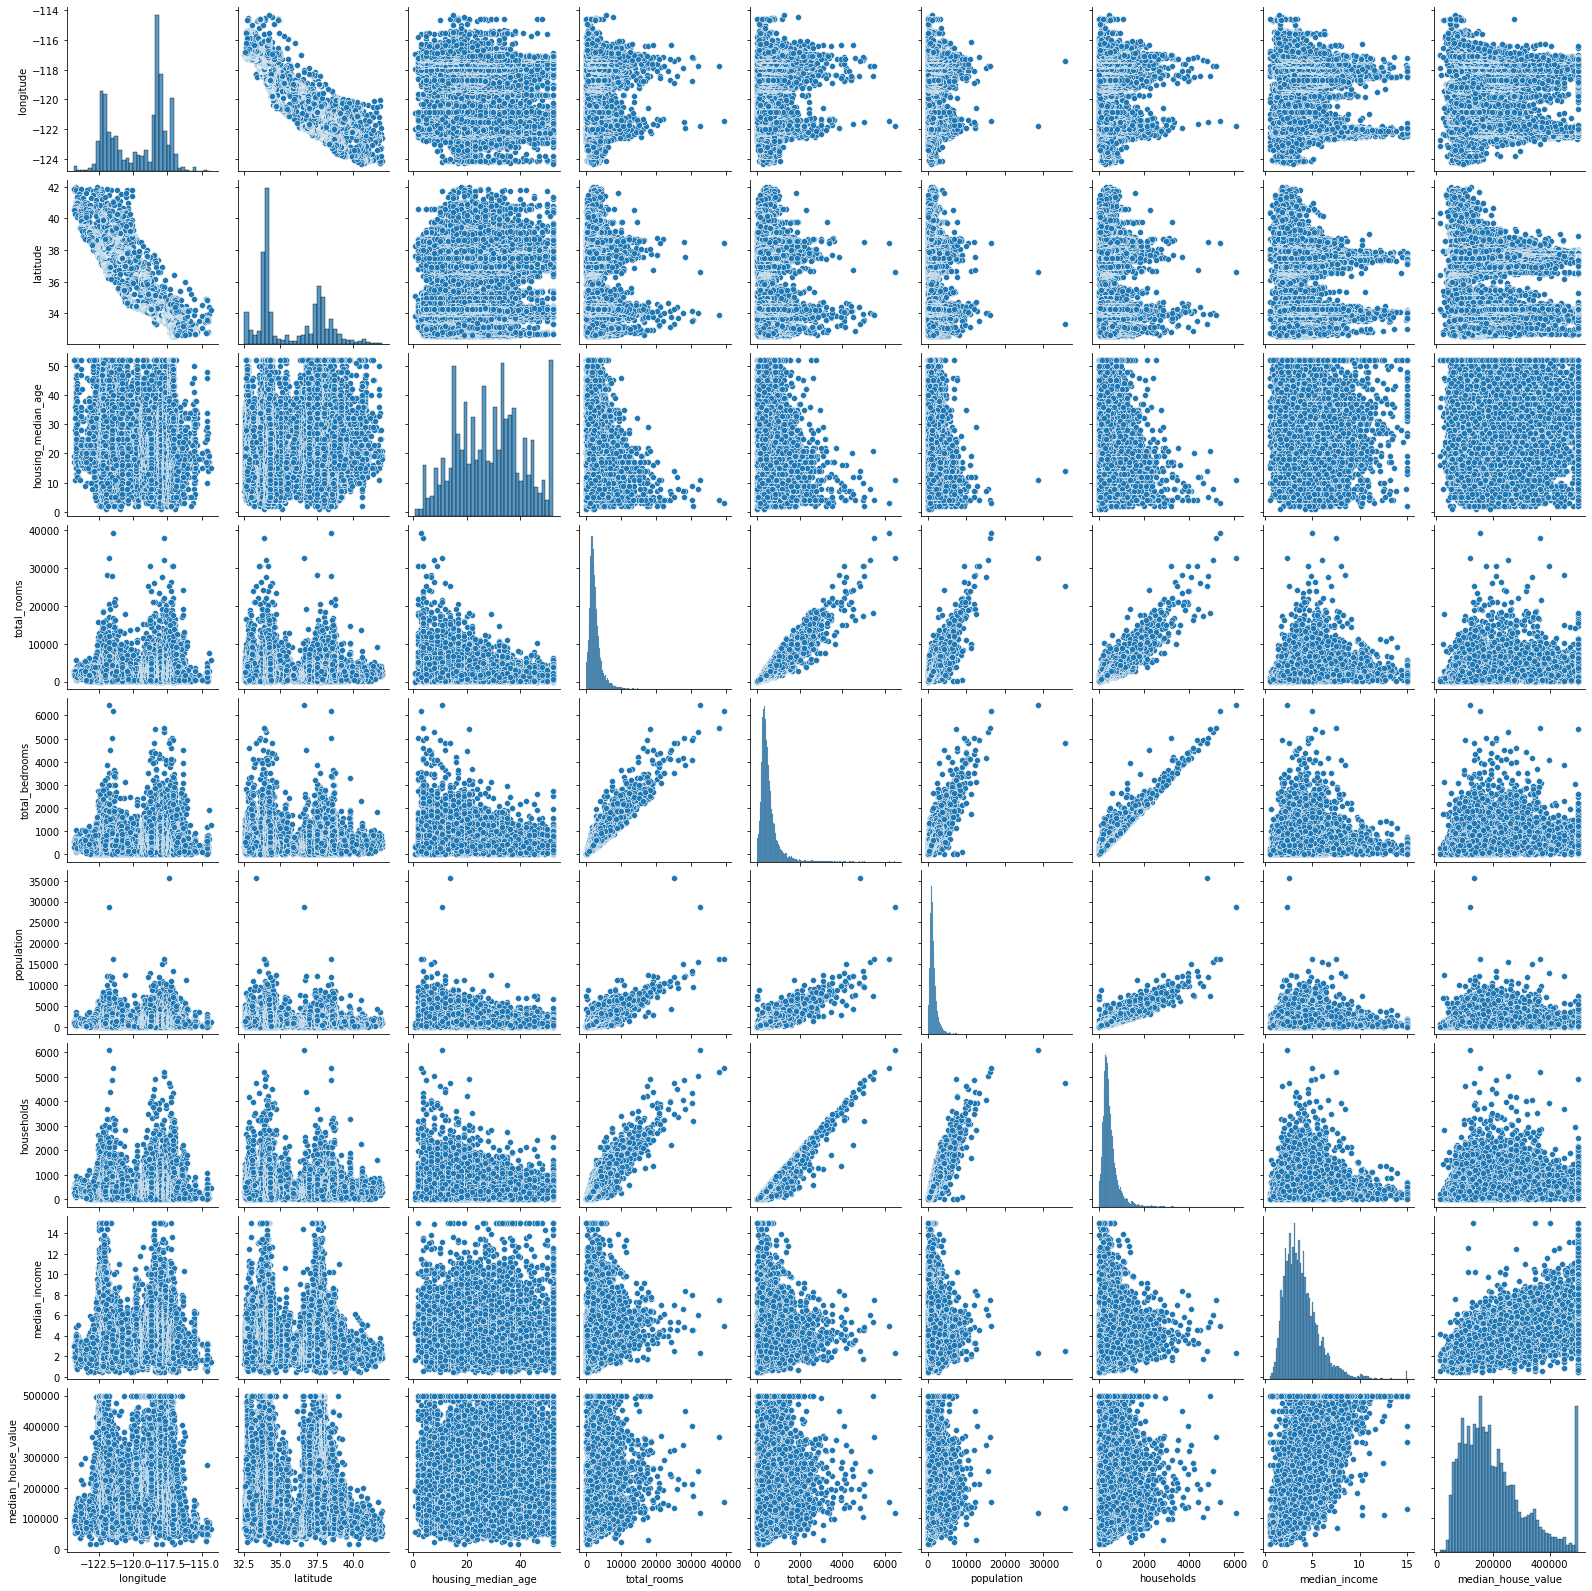

In [156]:
sns.pairplot(df)

In [157]:
import plotly.express as ex
ex.scatter(x = df.index,y = df['median_house_value'],color=df['ocean_proximity'])

In [158]:
#as seen from the graph above
'''
1. near ocean and <1H OCEAN cost about the same
2. Island house prices are more or less irrelevant as there are only 5 datapoints to work with out of 20640 points
3. Near bay and near ocean have the least number of higher end house prices (maybe because they have fewer houses to extract data from)
'''
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [159]:
mapper = {'INLAND':'0','<1H OCEAN':'0','NEAR OCEAN':'1','NEAR BAY':'1','ISLAND':'0.5'}
df['ocean_proximity'] = df['ocean_proximity'].map(mapper)
df['ocean_proximity']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: ocean_proximity, Length: 20433, dtype: object

In [165]:
#features that affect house values (not using longitude and lattitude)
feature_list = df.columns.tolist()
feature_list.remove('median_house_value')
updated_list = feature_list[2:]
X = df[updated_list]
y = df['median_house_value']


In [166]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [167]:
lm = LinearRegression()

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4)

In [169]:
lm.fit(X_train,y_train) #training the model

LinearRegression()

In [170]:
coef = pd.DataFrame(lm.coef_,index = updated_list,columns = ['Coef'])
coef

Coef
housing_median_age   1599.614551
total_rooms           -19.580324
total_bedrooms         94.222141
population            -29.005832
households            112.208191
median_income       46932.029626
ocean_proximity     33880.713937

In [ ]:
#Anomaly: A one unit increase in total_rooms causes a decrease of $19 for house median value (shouldnt more rooms mean higher price)
#Anomaly: A one unit increase in housing_median_age causes a decrease of $19 for house median value (shouldnt an older house cost lower)
#Expected: A one unit increase in ocean_proximity causes an increase of $33880 as we can see from the geoprahical representation earlier
#Expected: A one unit increase in median_income causes an increase of $46932 as more income causes more purchasing power

In [173]:
#exploring the anomalies
ex.scatter(x = df.index, y = df['median_house_value'], color = df['housing_median_age'])

In [ ]:
#Conclusion: Housing age has got nothing to do with price as many older homes are expensive than brand new homes vice versa

In [174]:
ex.scatter(x = df.index, y = df['median_house_value'], color = df['total_rooms'])

In [179]:
#no pattern i can discern

In [180]:
predictions = lm.predict(X_test)
predictions

array([224396.40843694, 245281.06644599, 207224.21283708, ...,
       167317.31052094, 202192.19718819, 161928.18014481])

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='median_house_value'>

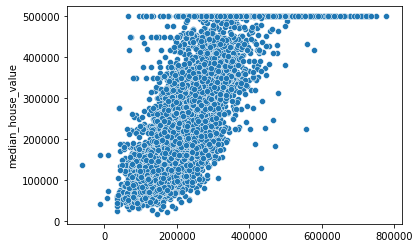

In [183]:
sns.scatterplot(predictions,y_test)

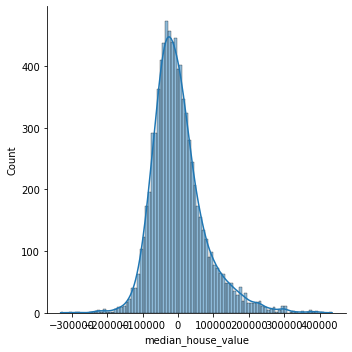

In [185]:
residuals = y_test - predictions
sns.displot(residuals,kde = True)

In [ ]:
#rediduals are rather normally distributed which is a good sign

In [190]:
from sklearn import metrics

In [191]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MAE

54781.448921682175

In [193]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
RMSE

74503.78708495306

In [200]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.58392897513238

In [ ]:
#the model can explain 58% of the variation